In [1]:
import pandas as pd

## Checking a Protein Sequence Structure from a fasta file

In [2]:
import requests
from Bio import SeqIO
from io import StringIO

fasta_url = "https://ftp.ebi.ac.uk/pub/contrib/UniProt/prediction_challenges/1_metal_binding/POS_TRAIN.fasta"

response = requests.get(fasta_url)

fasta_file = StringIO(response.text)

records = SeqIO.parse(fasta_file, "fasta")

In [3]:
# Convert the iterator into a dictionary
records_dict = [dict(id=record.id, description=record.description, sequence=str(record.seq)) for record in records]

print(len(records_dict))

2317


### We have 2317 sequence

In [4]:
records_dict[0], len(records_dict[0]['sequence'])

({'id': 'sp|A0A023GPI8|LECA_CANBL',
  'description': 'sp|A0A023GPI8|LECA_CANBL Lectin alpha chain OS=Canavalia boliviana OX=232300 PE=1 SV=1',
  'sequence': 'ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGKVGTAHIIYNSVGKRLSAVVSYPNGDSATVSYDVDLDNVLPEWVRVGLSATTGLYKETNTILSWSFTSKLKSNSTHETNALHFMFNQFSKDQKDLILQGDATTGRDGNLELTRVSSNGSPQGSSVGRALFYAPVHIWESSAVVASFDATFTFLIKSSDSHPADGIAFFISNIDSSIPSGSTGRLLGLFPDAN'},
 237)

## Checking a tsv file to look up metal-binding sites

In [5]:
tsv_url = "https://ftp.ebi.ac.uk/pub/contrib/UniProt/prediction_challenges/1_metal_binding/POS_TRAIN.tsv"

df = pd.read_csv(tsv_url, sep='\t')

df.head()

,Accession,Evidence,ChEBI-ID,Position
0,Q8INK9,ECO:0000269,CHEBI:29105,157
1,Q8INK9,ECO:0000269,CHEBI:29105,96
2,Q1QT89,ECO:0000269,CHEBI:18420,263
3,P07327,ECO:0000269,CHEBI:29105,101
4,P07327,ECO:0007744,CHEBI:29105,104


In [6]:
len(df)

18043

### We have 18043 metal binding site

In [7]:
len(df['ChEBI-ID'].unique())

23

### We have 23 different metal types

## Checking a tsv file to look up chebi-id for metal-bindings.

In [8]:
tsv_url_chebi = "https://ftp.ebi.ac.uk/pub/contrib/UniProt/prediction_challenges/1_metal_binding/ChEBI-IDs_for_metal_binding.tsv"

df_chebi = pd.read_csv(tsv_url_chebi, sep='\t')

df_chebi.head()

,ChEBI-ID,Name,ChEBI-ID Parents
0,CHEBI:48775,Cd(2+),"CHEBI:60240,CHEBI:25213"
1,CHEBI:29108,Ca(2+),"CHEBI:60240,CHEBI:25213"
2,CHEBI:48828,Co(2+),"CHEBI:60240,CHEBI:25213"
3,CHEBI:49415,Co(3+),CHEBI:25213
4,CHEBI:23378,Cu cation,CHEBI:25213


In [9]:
len(df_chebi)

29

In [10]:
# We do not need 'ChEBI-ID Parents' column. Also we can use the hole dataframe as dictionary which matches only the ChEBI-ID to the name like this: {'ChEBI-ID': 'Name'}
df_chebi_to_name = df_chebi[['ChEBI-ID', 'Name']].set_index('ChEBI-ID').to_dict()['Name']

# inverse the dictionary for name to chebi using df_chebi_to_name
df_name_to_chebi = {v: k for k, v in df_chebi_to_name.items()}

df_chebi_to_name, df_name_to_chebi

({'CHEBI:48775': 'Cd(2+)',
  'CHEBI:29108': 'Ca(2+)',
  'CHEBI:48828': 'Co(2+)',
  'CHEBI:49415': 'Co(3+)',
  'CHEBI:23378': 'Cu cation',
  'CHEBI:49552': 'Cu(+)',
  'CHEBI:29036': 'Cu(2+)',
  'CHEBI:60240': 'a divalent metal cation',
  'CHEBI:190135': '[2Fe-2S] cluster',
  'CHEBI:24875': 'Fe cation',
  'CHEBI:29033': 'Fe(2+)',
  'CHEBI:29034': 'Fe(3+)',
  'CHEBI:30408': 'iron-sulfur cluster',
  'CHEBI:49713': 'Li(+)',
  'CHEBI:18420': 'Mg(2+)',
  'CHEBI:29035': 'Mn(2+)',
  'CHEBI:16793': 'Hg(2+)',
  'CHEBI:49786': 'Ni(2+)',
  'CHEBI:60400': '[Ni-Fe-S] cluster',
  'CHEBI:47739': '[Ni-4Fe-4S] cluster',
  'CHEBI:29103': 'K(+)',
  'CHEBI:29101': 'Na(+)',
  'CHEBI:49883': '[4Fe-4S] cluster',
  'CHEBI:21137': '[3Fe-4S] cluster',
  'CHEBI:29105': 'Zn(2+)',
  'CHEBI:177874': '[Ni-4Fe-5S] cluster',
  'CHEBI:21143': '[8Fe-7S] cluster',
  'CHEBI:60504': '[8Fe-9S-C-homocitryl] cluster',
  'CHEBI:25213': 'a metal cation'},
 {'Cd(2+)': 'CHEBI:48775',
  'Ca(2+)': 'CHEBI:29108',
  'Co(2+)': 'CHEBI:48

## Merging two dataframe

In [11]:
merged_df = pd.merge(df, df_chebi, on='ChEBI-ID')
merged_df[merged_df['Name'] == 'Mn(2+)'].head(10)

,Accession,Evidence,ChEBI-ID,Position,Name,ChEBI-ID Parents
13581,Q6TEC1,ECO:0000269,CHEBI:29035,150,Mn(2+),"CHEBI:60240,CHEBI:25213"
13582,P0AAB4,ECO:0000269,CHEBI:29035,175,Mn(2+),"CHEBI:60240,CHEBI:25213"
13583,P46637,ECO:0000269,CHEBI:29035,161,Mn(2+),"CHEBI:60240,CHEBI:25213"
13584,Q7NXD4,ECO:0000269,CHEBI:29035,248,Mn(2+),"CHEBI:60240,CHEBI:25213"
13585,P36873,ECO:0000269,CHEBI:29035,92,Mn(2+),"CHEBI:60240,CHEBI:25213"
13586,A0A256XLS3,ECO:0007744,CHEBI:29035,143,Mn(2+),"CHEBI:60240,CHEBI:25213"
13587,A0A256XLS3,ECO:0000269,CHEBI:29035,77,Mn(2+),"CHEBI:60240,CHEBI:25213"
13588,P34047,ECO:0000269,CHEBI:29035,236,Mn(2+),"CHEBI:60240,CHEBI:25213"
13589,P34047,ECO:0007744,CHEBI:29035,232,Mn(2+),"CHEBI:60240,CHEBI:25213"
13590,C0HJY1,ECO:0000269,CHEBI:29035,8,Mn(2+),"CHEBI:60240,CHEBI:25213"


In [12]:
len(merged_df)

18043

In [13]:
len(merged_df['Accession'].unique()) == len(records_dict)

True

## Check the distributions of the size of the sequences

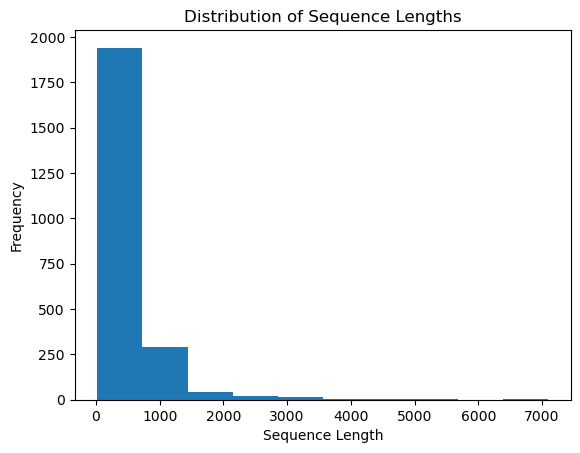

In [14]:
import matplotlib.pyplot as plt

# Get the lengths of the sequences
sequence_lengths = [len(record['sequence']) for record in records_dict]

# Create a histogram
plt.hist(sequence_lengths, bins=10)

# Set the labels and title
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')

# Show the histogram
plt.show()

In [15]:
# calculate the average sequence length
avg_seq_len = int(sum(sequence_lengths) / len(sequence_lengths))
avg_seq_len

513

In [16]:
# counts of name columns in histogram
name_counts = merged_df['Name'].value_counts()

name_counts

Name
Zn(2+)                     5788
Ca(2+)                     4768
Mg(2+)                     2140
Mn(2+)                     1136
Fe cation                   919
[4Fe-4S] cluster            885
a divalent metal cation     738
Cu cation                   561
[2Fe-2S] cluster            348
K(+)                        163
Na(+)                       142
Fe(3+)                      136
Ni(2+)                       77
Co(2+)                       50
Cd(2+)                       50
[3Fe-4S] cluster             36
Cu(2+)                       33
Cu(+)                        27
Fe(2+)                       22
[Ni-4Fe-4S] cluster          12
[Ni-4Fe-5S] cluster           6
Co(3+)                        4
Hg(2+)                        2
Name: count, dtype: int64

## Filtering the ions by their counts.

In [17]:
name_counts = merged_df['Name'].value_counts()
merged_df = merged_df[merged_df['Name'].isin(name_counts[name_counts >= 75].index)]

In [18]:
name_counts = merged_df['Name'].value_counts()

name_counts

Name
Zn(2+)                     5788
Ca(2+)                     4768
Mg(2+)                     2140
Mn(2+)                     1136
Fe cation                   919
[4Fe-4S] cluster            885
a divalent metal cation     738
Cu cation                   561
[2Fe-2S] cluster            348
K(+)                        163
Na(+)                       142
Fe(3+)                      136
Ni(2+)                       77
Name: count, dtype: int64

In [19]:
# dictionary for creating labels from starting 1 to total name_counts
name_to_label = {name: i+1 for i, name in enumerate(name_counts.index)}

# also the opposite
label_to_name = {v: k for k, v in name_to_label.items()}

name_to_label, label_to_name

({'Zn(2+)': 1,
  'Ca(2+)': 2,
  'Mg(2+)': 3,
  'Mn(2+)': 4,
  'Fe cation': 5,
  '[4Fe-4S] cluster': 6,
  'a divalent metal cation': 7,
  'Cu cation': 8,
  '[2Fe-2S] cluster': 9,
  'K(+)': 10,
  'Na(+)': 11,
  'Fe(3+)': 12,
  'Ni(2+)': 13},
 {1: 'Zn(2+)',
  2: 'Ca(2+)',
  3: 'Mg(2+)',
  4: 'Mn(2+)',
  5: 'Fe cation',
  6: '[4Fe-4S] cluster',
  7: 'a divalent metal cation',
  8: 'Cu cation',
  9: '[2Fe-2S] cluster',
  10: 'K(+)',
  11: 'Na(+)',
  12: 'Fe(3+)',
  13: 'Ni(2+)'})

## Filtering the sequences by length

In [20]:
filtered_records = [record for record in records_dict if len(record['sequence']) <= 1024] # 1024 is the max length of the sequence (just for beginning)

In [21]:
len(filtered_records)

2135

### In the beginning we have 2317 sequences. After filtering we have 2135 sequences which it's length longer than 1024

In [22]:
filtered_records[0]

{'id': 'sp|A0A023GPI8|LECA_CANBL',
 'description': 'sp|A0A023GPI8|LECA_CANBL Lectin alpha chain OS=Canavalia boliviana OX=232300 PE=1 SV=1',
 'sequence': 'ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGKVGTAHIIYNSVGKRLSAVVSYPNGDSATVSYDVDLDNVLPEWVRVGLSATTGLYKETNTILSWSFTSKLKSNSTHETNALHFMFNQFSKDQKDLILQGDATTGRDGNLELTRVSSNGSPQGSSVGRALFYAPVHIWESSAVVASFDATFTFLIKSSDSHPADGIAFFISNIDSSIPSGSTGRLLGLFPDAN'}

## Adjusting id column

In [23]:
# Remove the description part of the records
records_cleaned = [{'id': record['id'].split('|')[1], 'sequence': record['sequence']} for record in filtered_records]
records_cleaned[0]

{'id': 'A0A023GPI8',
 'sequence': 'ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGKVGTAHIIYNSVGKRLSAVVSYPNGDSATVSYDVDLDNVLPEWVRVGLSATTGLYKETNTILSWSFTSKLKSNSTHETNALHFMFNQFSKDQKDLILQGDATTGRDGNLELTRVSSNGSPQGSSVGRALFYAPVHIWESSAVVASFDATFTFLIKSSDSHPADGIAFFISNIDSSIPSGSTGRLLGLFPDAN'}

## Removing multi-bounded ions according to the total counts in the data. If a number of ion more than another, it overrides the other ion in the same aminoacid. 

In [24]:
# Group the dataframe by "Accession", "Position", and "ChEBI-ID" columns and get the count
counts = merged_df.groupby(['Accession', 'Position', 'Name']).size()

# Get the indices of the maximum count for each group
max_counts_index = counts.groupby(level=[0, 1]).idxmax()

# convert the max_counts_index to a dataframe which has 3 columns (Accession, Position, ChEBI-ID)
max_counts_df = pd.DataFrame(max_counts_index.tolist(), columns=['Accession', 'Position', 'Name'])
max_counts_df.head(10)

,Accession,Position,Name
0,A0A023GPI8,8,Mn(2+)
1,A0A023GPI8,10,Ca(2+)
2,A0A023GPI8,12,Ca(2+)
3,A0A023GPI8,14,Ca(2+)
4,A0A023GPI8,19,Ca(2+)
5,A0A023GPI8,24,Mn(2+)
6,A0A067XG71,8,Mn(2+)
7,A0A067XG71,10,Ca(2+)
8,A0A067XG71,12,Ca(2+)
9,A0A067XG71,14,Ca(2+)


In [25]:
max_counts_df[max_counts_df['Accession'] == 'A0A023GPI8']

,Accession,Position,Name
0,A0A023GPI8,8,Mn(2+)
1,A0A023GPI8,10,Ca(2+)
2,A0A023GPI8,12,Ca(2+)
3,A0A023GPI8,14,Ca(2+)
4,A0A023GPI8,19,Ca(2+)
5,A0A023GPI8,24,Mn(2+)


## Creating labels using name_to_label for each ion. The labels are lists as same length as the sequences itself. Each index corresponds the ion labels.  

In [26]:
for record in records_cleaned:

    accession = record['id']
    sequence = record['sequence']
    boundings_df = max_counts_df[max_counts_df['Accession'] == accession]

    # create a list of zeros with the length of the sequence and then fill the indices with names to labels dictionary for the positions of the metal binding sites
    metal_binding_sites = [0] * len(sequence)
    for _, row in boundings_df.iterrows():
        metal_binding_sites[row['Position'] - 1] = name_to_label[row['Name']]
    
    record['metal_binding_sites'] = metal_binding_sites

In [27]:
records_cleaned[0]

{'id': 'A0A023GPI8',
 'sequence': 'ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGKVGTAHIIYNSVGKRLSAVVSYPNGDSATVSYDVDLDNVLPEWVRVGLSATTGLYKETNTILSWSFTSKLKSNSTHETNALHFMFNQFSKDQKDLILQGDATTGRDGNLELTRVSSNGSPQGSSVGRALFYAPVHIWESSAVVASFDATFTFLIKSSDSHPADGIAFFISNIDSSIPSGSTGRLLGLFPDAN',
 'metal_binding_sites': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  2,
  0,
  2,
  0,
  2,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [28]:
# create a folder named data first
!mkdir data

In [29]:
# save all the records to a json file
import json

with open('data/records.json', 'w') as f:
    json.dump(records_cleaned, f)

# save the name to label and label to name dictionaries to a json file
with open('data/name_to_label.json', 'w') as f:
    json.dump(name_to_label, f)

with open('data/label_to_name.json', 'w') as f:
    json.dump(label_to_name, f)